# Introduction

In this project, I will be working with a dataset containing data on `644` applicants with the following columns:

- **gre** - applicant's score on the Graduate Record Exam, a generalized test for prospective graduate students. 
  - Score ranges from 200 to 800.


- **gpa** - college grade point average.
  - Continuous between 0.0 and 4.0.


- **admit** - binary value 
  - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
admissions = pd.read_csv('/storage/emulated/0/DataQuest/Datasets/admissions.csv')


### Quick Data Exploration

In [3]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   644 non-null    int64  
 1   gpa     644 non-null    float64
 2   gre     644 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.2 KB


### Observations

There is a total of `644` entries in the dataframe; each of the columns have `644` non-null values too, which implies that none of the column have null values. No further cleaning as regards to null-values is required.

While we can use both the `gpa` and `gre` columns to predict the `admit` column, we'll focus on using just the `gpa` column to keep things simple. 

Now Let's visualize the relationship between `gpa` and `admit`.

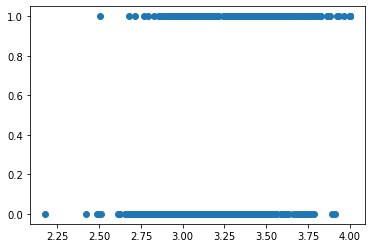

In [4]:
plt.scatter(x='gpa', y='admit', data=admissions)
plt.show()

The `gpa` and `admit` column do not have a clear linear relationship. The values, `0` and `1`, contained in the `admit` columns are binary values that don't carry any weight. These are otherwise referred to as **categorical values**.

We are going to be using **Logistic Regression** to predict whether or not a candidate should be given admission on the basis of the **gpa** score. 

But first, let's make a quick digression by having a quick look at what Logistic Regression entails. 

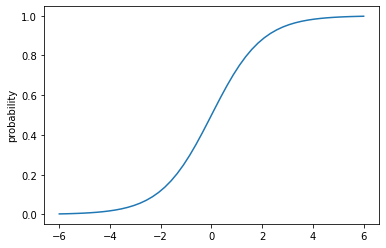

In [5]:
# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential
    # power. i.e e^x. e1 ≈ 2.71828
    return np.exp(x) / (1 + np.exp(x))
# the exponential transformation in the above
# function transforms all values to be positive. 


# now let's generate 50 real values that are
# evenly spaced between -6 and 6
x = np.linspace(-6, 6, 50, dtype=float)

# we can apply the logistic function to transform 
# each number in x 
y = logistic(x)

# plot the resulting data
plt.plot(x, y) 
plt.ylabel('probability')
plt.show()

We can now train the Logistic Regression Model using our dataset. We will use the **scikit-learn** library to fit a model between the `gpa` and `admit` columns.

I should mention that we are working with just one feature column (`gpa`) here, so this is a univariate model. 

In [6]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression() 
logistic_model.fit(admissions[['gpa']], admissions['admit']) 


LogisticRegression()

We are going to use the trained model to return the predicted probability for each row in the training data using the `predict_proba` method.

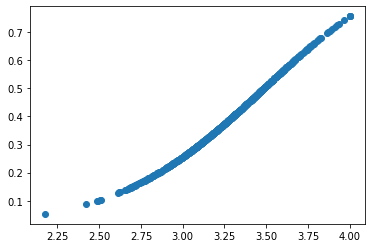

In [7]:
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
plt.scatter(admissions['gpa'], pred_probs[:, 1])
plt.show()


We can see that the scatter plot suggests a linear relationship between the `gpa` values and the probability of being admitted. This is because **logistic regression** is really just an adapted version of **linear regression** for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's use the `predict` method to return the label predictions for each row in our training dataset.

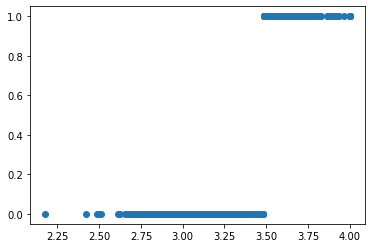

In [8]:
labels = logistic_model.predict(admissions[['gpa']])
plt.scatter(admissions['gpa'], labels)
plt.show()


In [9]:
admissions['predicted_label'] = labels

In [10]:
admissions

,admit,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
...,...,...,...,...
639,1,3.381359,720.718438,0
640,1,3.083956,556.918021,0
641,1,3.114419,734.297679,0
642,1,3.549012,604.697503,1


The simplest way to determine the effectiveness of a classification model is `prediction accuracy`.

This helps us answer the question:

- What fraction of predictions were correct?

Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations.


\begin{equation}
Accuracy = \frac{\#~of~Correctly~Predicted}{\#~of~Observations}
\label{eq. 1}
\end{equation}

Now to decide who gets admitted, we set a threshold, and accept all of the students whose computed probability exceeds that threshold. **Scikit-learn** sets it to **0.5** by default when predicting labels. So if the computed probability is greater than **0.5**, the label for that observation is **1**. If it is less than **0.5**, the label for the observation is **0**.

An accuracy of **1.0** will mean that the model predicted **100%** of the admissions correctly for a given discrimination threshold.

Niw let's calculate the accuracy for the logistic regression model made. 

In [11]:
admissions.rename({'admit':'actual_label'}, axis=1,  inplace=True)


In [12]:
admissions

,actual_label,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
...,...,...,...,...
639,1,3.381359,720.718438,0
640,1,3.083956,556.918021,0
641,1,3.114419,734.297679,0
642,1,3.549012,604.697503,1


In [13]:
correct_predictions = admissions[admissions['actual_label'] == admissions['predicted_label']]


In [14]:
correct_predictions

,actual_label,gpa,gre,predicted_label
0,0,3.177277,594.102992,0
1,0,3.412655,631.528607,0
2,0,2.728097,553.714399,0
3,0,3.093559,551.089985,0
4,0,3.141923,537.184894,0
...,...,...,...,...
631,1,3.567503,570.997409,1
634,1,3.785356,633.641188,1
636,1,3.868572,658.912044,1
642,1,3.549012,604.697503,1


In [15]:
accuracy = len(correct_predictions) / len(admissions)


In [16]:
round(accuracy, 3)

0.685

The accuracy of a model on the dataset used for training is a useful initial step just to make sure the model at least beats randomly assigning a label for each observation. But prediction accuracy doesn't tell us much more.

- The accuracy doesn't tell us how the model performs on data it wasn't trained on. 


- A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). 


- Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make.


For now, we focus on the principles of evaluating binary classification models by testing our model's effectiveness on the training data.

In [17]:
true_positives = len(admissions[(admissions['actual_label'] == 1) & (admissions['predicted_label'] == 1)])

true_negatives = len(admissions[(admissions['actual_label'] == 0) & (admissions['predicted_label'] == 0)])


Let's look at more measures that are more insightful than simple accuracy.

- **Sensitivity or True Positive Rate (TPR)** - This describes the proportion of applicants that were correctly admitted.

\begin{equation}
TPR = \frac{True~Positives}{True~Positives + False~Negatives}
\label{eq. 2}
\end{equation}

**(True Positives + False Negatives)** here is all the students that should have been admitted. So what fraction did the model correctly admit **(True Positives)**?

This measure help us determine how effective the model is in identifying positive outcomes. We usually want a high sensitive model that is able to 'catch' all of the positive cases.

In [19]:
false_negatives = len(admissions[(admissions['actual_label'] == 1) & (admissions['predicted_label'] == 0)])


In [20]:
sensitivity = true_positives / (true_positives + false_negatives)
round(sensitivity, 3)

0.365

Looks like the sensitivity of the model is around **36.5%** and only about 1 in 3 students that should have been admitted were actually admitted. 

In the context of predicting student admissions, this probably isn't too bad of a thing. Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching **36.5%** of positive cases for an illness, then around 2 of 3 people are going undiagnosed (being classified as false negatives). 

Let's now talk about specificity. 

- **Specificity or True Negative Rate (TNR)** - The proportion of applicants that were correctly rejected.

\begin{equation}
TNR = \frac{True~Negatives}{True~Negatives + False~Positives}
\label{eq. 3}
\end{equation}

**(True Negatives + False Positives)** here is all the students that should have been rejected. So wyat proportion of these were correctly rejected **(True Negatives)**.

This measure help us determine how effective the model is at identifying negative outcomes.

In [21]:
false_positives = len(admissions[(admissions['actual_label']==0) & (admissions['predicted_label']==1)])


In [22]:
specificity = true_negatives / (true_negatives + false_positives)

round(specificity, 3)

0.88

In [29]:
# percentage of students admitted by the model
len(admissions[admissions['predicted_label']==1])/len(admissions)

0.2127329192546584

It looks like the specificity of the model is **88%**. This means that the model is really good at knowing which applicants to reject. Since around only **21%** of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.